In [300]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Preprocessing --------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score


In [249]:
# Data Source:
# Original owners of database:
# 	Marine Resources Division
# 	Marine Research Laboratories - Taroona
# 	Department of Primary Industry and Fisheries, Tasmania
# 	GPO Box 619F, Hobart, Tasmania 7001, Australia
# 	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)
# Donor of database:
# 	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
# 	Department of Computer Science, University of Tasmania
# 	GPO Box 252C, Hobart, Tasmania 7001, Australia

# Information: 
#    Predicting the age of abalone from physical measurements.  The age of
#    abalone is determined by cutting the shell through the cone, staining it,
#    and counting the number of rings through a microscope -- a boring and
#    time-consuming task.  Other measurements, which are easier to obtain, are
#    used to predict the age.  Further information, such as weather patterns
#    and location (hence food availability) may be required to solve the problem.

# Data Dictionary:

# 	Sex		nominal			M, F, and I (infant)
# 	Length		continuous	mm	Longest shell measurement
# 	Diameter	continuous	mm	perpendicular to length
# 	Height		continuous	mm	with meat in shell
# 	Whole weight	continuous	grams	whole abalone
# 	Shucked weight	continuous	grams	weight of meat
# 	Viscera weight	continuous	grams	gut weight (after bleeding)
# 	Shell weight	continuous	grams	after being dried
# 	Rings		integer			+1.5 gives the age in years

In [250]:
#Column Names are obtained from Abalone Names File
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [251]:
#Load Data with Column Names and perform a quick check
df_raw = pd.read_csv('../data/raw/abalone.data', names=column_names, header=None)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [252]:
df_raw.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1635,I,0.575,0.450,0.125,0.7800,0.3275,0.1880,0.2350,9
3036,I,0.550,0.445,0.145,0.7830,0.3045,0.1570,0.2650,11
3900,M,0.445,0.345,0.140,0.4760,0.2055,0.1015,0.1085,15
3237,M,0.635,0.510,0.155,1.1560,0.4280,0.2890,0.3150,18
333,I,0.235,0.175,0.040,0.0705,0.0335,0.0150,0.0200,5
2011,M,0.450,0.330,0.105,0.4955,0.2575,0.0820,0.1290,8
529,M,0.385,0.300,0.095,0.2400,0.0885,0.0590,0.0850,9
3898,F,0.565,0.460,0.150,0.8765,0.3455,0.1925,0.2750,10
2364,F,0.600,0.470,0.200,1.0310,0.3920,0.2035,0.2900,15
3864,I,0.320,0.235,0.065,0.1385,0.0580,0.0225,0.0500,5


In [253]:
#Rings defines the age in years for the abalone, so this varible will be the dependant variable

In [254]:
df_processed = df_raw.copy()

In [255]:
df_processed['Sex'].value_counts()
#Value counts for Sex shows that the Dataset is well distributed by Sex Category

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [256]:
#Sex variable is transformed to Categorical
df_processed['Sex'] = pd.Categorical(df_processed['Sex'])

In [309]:
#Basic EDA on Train Dataset

# 3.1. Create Train and Test subsets
#Some Columns are droped as per correlation > 0.9
X = df_processed.copy().drop(['Rings'],axis=1)

y = df_processed['Rings'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1400, test_size=0.2) #Stratify: stratificar entre yes y no de specialty

df_train = pd.concat([X_train, y_train], axis=1)

In [310]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3341 entries, 3841 to 2133
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             3341 non-null   category
 1   Length          3341 non-null   float64 
 2   Diameter        3341 non-null   float64 
 3   Height          3341 non-null   float64 
 4   Whole weight    3341 non-null   float64 
 5   Shucked weight  3341 non-null   float64 
 6   Viscera weight  3341 non-null   float64 
 7   Shell weight    3341 non-null   float64 
 8   Rings           3341 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 238.3 KB


In [311]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,3341,3,M,1229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,3341.0,NaN,NaN,NaN,0.52449,0.120839,0.075,0.45,0.545,0.615,0.815
Diameter,3341.0,NaN,NaN,NaN,0.408454,0.099835,0.055,0.35,0.425,0.48,0.65
Height,3341.0,NaN,NaN,NaN,0.139765,0.042862,0.0,0.115,0.14,0.165,1.13
Whole weight,3341.0,NaN,NaN,NaN,0.832859,0.493214,0.002,0.444,0.8035,1.1625,2.8255
Shucked weight,3341.0,NaN,NaN,NaN,0.360943,0.222203,0.001,0.188,0.339,0.5055,1.488
Viscera weight,3341.0,NaN,NaN,NaN,0.181609,0.110607,0.0005,0.0945,0.171,0.2565,0.76
Shell weight,3341.0,NaN,NaN,NaN,0.239993,0.140652,0.0015,0.13,0.235,0.33,1.005
Rings,3341.0,NaN,NaN,NaN,9.937743,3.244297,1.0,8.0,9.0,11.0,29.0


In [312]:
#The proportion of the independant variables is not big, but is significant (almost 2x), it is possible to apply the regression with scaling 

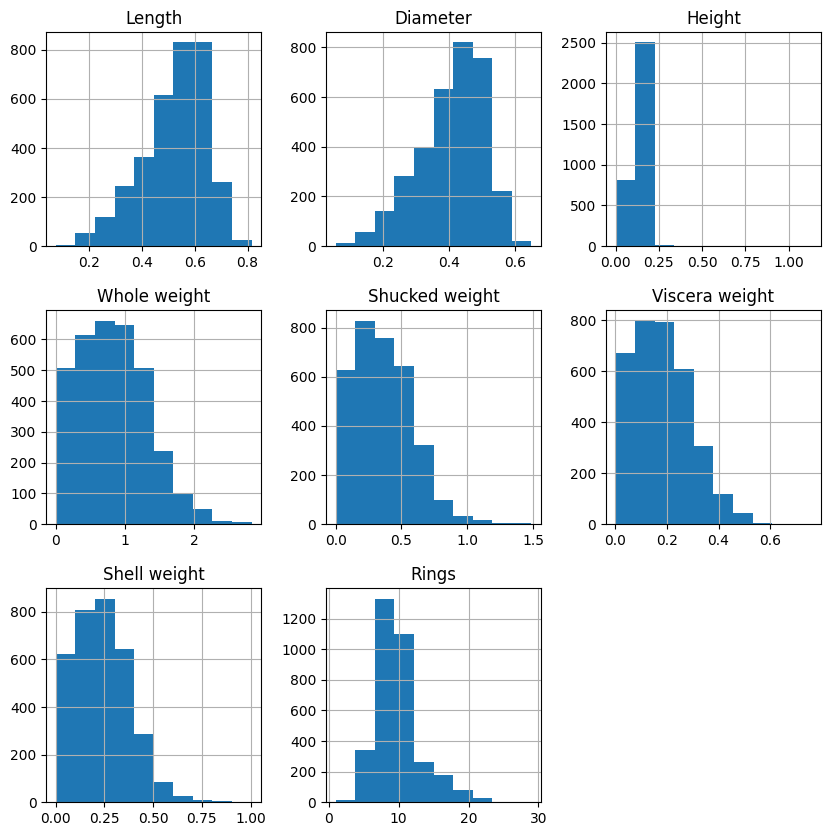

In [313]:
#Analisys for Numerical Variables
df_train.hist(figsize=(10,10))
plt.show()

In [314]:
#Las distribuciones para las variables poseen sesgos: Lenght, Diameter y Height: Sesgo Negativo
#Weights: Sesgo Postivo

#La variable height podria ser canditada a ser removida.
df_train['Height'].value_counts()

Height
0.150    218
0.140    180
0.155    174
0.175    168
0.160    161
0.125    156
0.135    155
0.165    152
0.145    140
0.120    138
0.130    137
0.170    129
0.100    111
0.180    110
0.110    103
0.115     98
0.090     95
0.105     94
0.185     83
0.190     80
0.095     72
0.085     67
0.195     66
0.080     60
0.200     53
0.075     52
0.070     33
0.065     33
0.205     32
0.215     25
0.060     21
0.210     19
0.055     18
0.220     16
0.050     16
0.225     13
0.045     11
0.040     10
0.230      8
0.035      6
0.235      5
0.030      5
0.240      4
0.025      3
0.250      3
0.020      2
0.000      2
0.010      1
0.515      1
0.015      1
1.130      1
Name: count, dtype: int64

In [315]:
#Sin embargo viendo los valores numericos se nota que si existe mucha variacion.

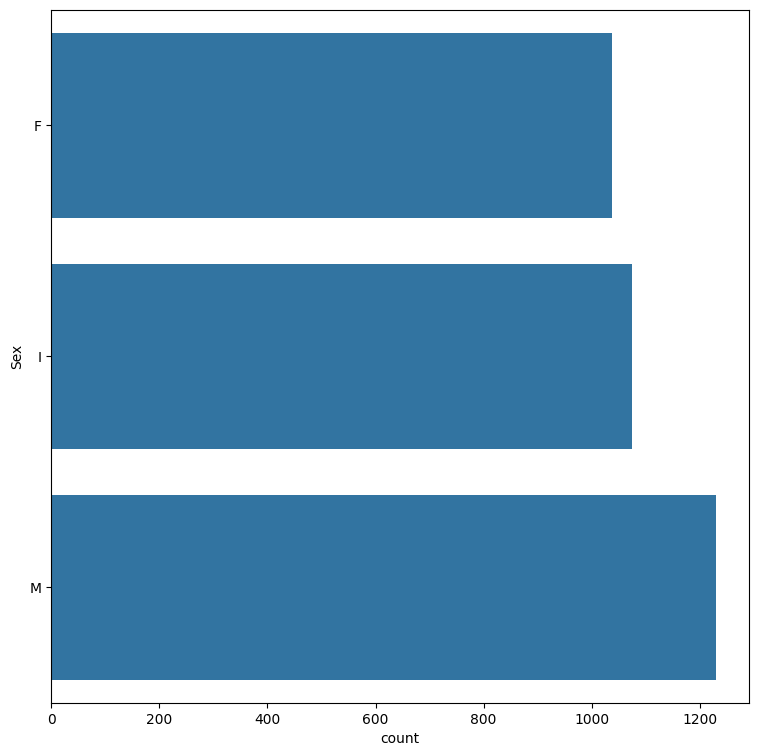

In [316]:
#Analysis (univariate) for Categorical Variables

fig,ax = plt.subplots(1, 1, figsize = (9,9))

sns.countplot(data=df_train, y='Sex')

plt.show()

In [317]:
#Se tiene un dataset balanceado para la categoria Sexo.

In [318]:
#Correlation Analysis 
df_train.select_dtypes('number').corr()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986607,0.813583,0.925535,0.898914,0.902829,0.896154,0.561454
Diameter,0.986607,1.000000,0.819055,0.925983,0.894244,0.899807,0.903938,0.578536
Height,0.813583,0.819055,1.000000,0.807055,0.764735,0.786183,0.803016,0.554724
Whole weight,0.925535,0.925983,0.807055,1.000000,0.969475,0.965809,0.955004,0.545527
Shucked weight,0.898914,0.894244,0.764735,0.969475,1.000000,0.930620,0.881511,0.426422
Viscera weight,0.902829,0.899807,0.786183,0.965809,0.930620,1.000000,0.906598,0.509934
Shell weight,0.896154,0.903938,0.803016,0.955004,0.881511,0.906598,1.000000,0.632647
Rings,0.561454,0.578536,0.554724,0.545527,0.426422,0.509934,0.632647,1.000000


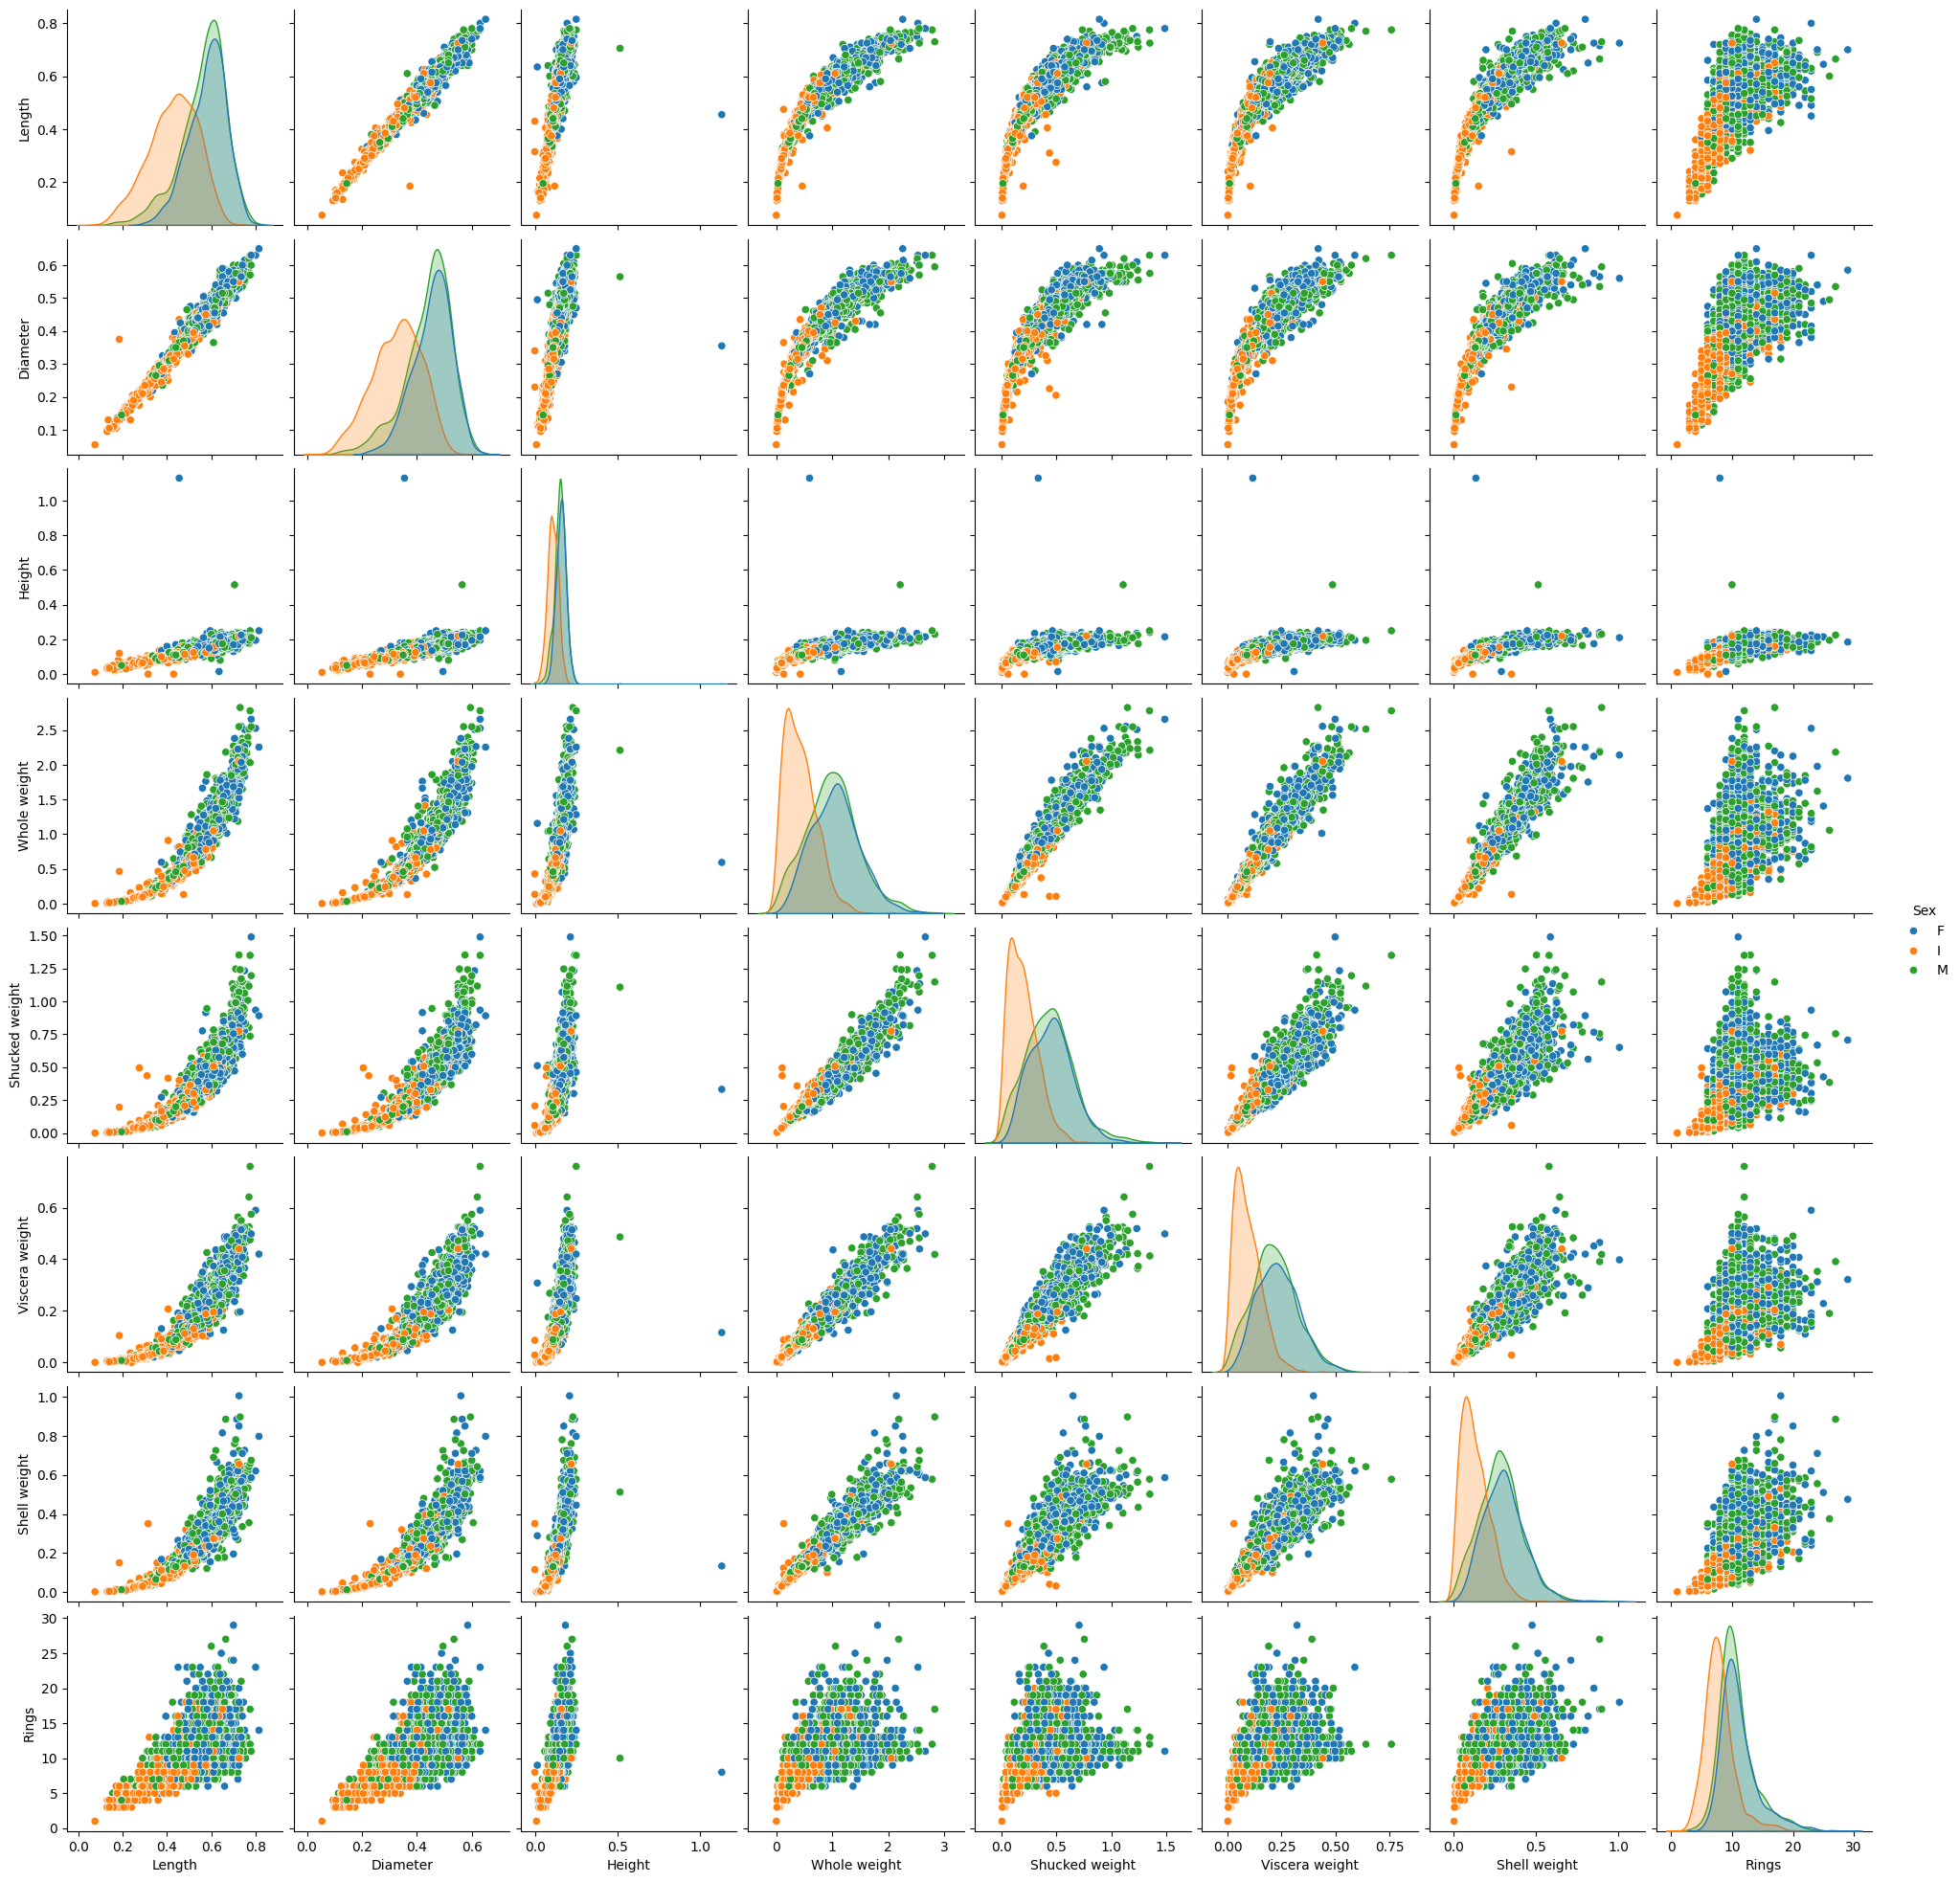

In [319]:
sns.pairplot(data=df_train, hue='Sex')
plt.show()

In [320]:
#Lenght and Diameter have a big Correlation

#Different Weights have a huge correlation, as they are related to Whole Weight (With some lost: bleeding and drying)

In [ ]:
#PROFE: Cuando se tiene mucha correlacion, se aplica PCA. Para garantizar la independencia

In [321]:
# 4. Model Training and Prediction
cat_cols = X_train.select_dtypes('category').columns #cat_cols variables categoricas
num_cols = X_train.select_dtypes('number').columns   # num_cols variables numericas

In [322]:
# 4.1. Create Pipeline

cat_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse=False)) #sparse son varias columnas, con false las comprime 
])
#onehot convierte las variables categoricas a numeros.
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())    # escala los datos a una media de cero y un rango unitario (desviación)
])
#StandardScaler se usa este escaler porque las variables son casi simetricas.

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [323]:
#The Casifier is added to the pipeline
linear_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [324]:
#Model is fit to the Train Data
linear_regression_model.fit(X_train,y_train)

/home/arnaldochm/Documents/BootCamp_DataScience/Clases/abalone_class_test/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Sex'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [325]:
print(f"Intercept (a): {linear_regression_model['model'].intercept_}")
print(f"Coefficients (b): {linear_regression_model['model'].coef_}")

Intercept (a): 9.924928298168307
Coefficients (b): [ 0.20663827 -0.53564353  0.32900526  0.05724873  1.03068297  0.4636738
  4.39866626 -4.43609735 -1.13113824  1.22864071]


In [326]:
y_hat = linear_regression_model.predict(X_test)
y_hat

array([ 9.1752707 , 12.02996194,  7.38954976,  6.87756344, 11.34316483,
       11.90188365,  6.18894657, 10.12340078, 10.86171326, 10.91783659,
       11.88803461, 12.37913373, 12.35206458, 12.77458555,  9.43867129,
        8.60573   ,  8.75394056,  5.62778069, 11.21816607, 11.79037663,
       10.58677051, 10.65646403, 11.59243779, 11.20102524,  8.17873269,
       13.83090957,  8.11481955,  8.99498555,  9.80398769,  9.29497965,
        9.72019334, 16.71299145,  8.06284195,  9.55369591, 10.64995405,
       13.28018595,  7.33068054, 11.58818087,  7.55925899, 12.25035593,
        6.45511355, 12.98300285,  7.43076959,  6.40374558, 12.5002694 ,
        8.26955937,  7.45620939,  8.70232354, 11.99956046,  8.95205962,
        9.29693428, 10.74672638,  8.6480087 ,  7.7054042 ,  8.93093597,
        7.86973591, 10.9018687 , 11.68922252,  9.72429922,  9.11004948,
       11.75399679,  6.75432245, 11.28928691,  9.0041579 , 10.04113995,
        9.66074031, 11.51062624, 11.90947598,  8.83847519,  7.88

In [327]:
print(f"Lineal Regresson: Mean squared error: {mean_squared_error(y_test, y_hat):.4f}")
print(f"Lineal Regresson: Coefficient of determination: {r2_score(y_test, y_hat):.4f}")

Lineal Regresson: Mean squared error: 4.7124
Lineal Regresson: Coefficient of determination: 0.5228


In [328]:
#The Casifier is added to the pipeline
regression_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

In [329]:
regression_tree_model.fit(X_train,y_train)

/home/arnaldochm/Documents/BootCamp_DataScience/Clases/abalone_class_test/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Sex'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [330]:
y_hat_rt = regression_tree_model.predict(X_test)
y_hat_rt

array([ 8., 13.,  9., 11.,  9., 19.,  5.,  9.,  9., 12., 11., 11., 10.,
       10., 10., 10., 15.,  4., 17., 16.,  9., 10., 19., 14.,  9., 12.,
       11.,  9.,  9.,  9., 11., 10.,  7.,  8., 12., 20.,  7., 10., 11.,
       13., 10.,  9.,  8.,  6., 12.,  8.,  7.,  9., 10.,  8.,  7.,  9.,
        9.,  6.,  7., 10.,  7., 13., 10., 13., 19.,  6., 10.,  9.,  9.,
       10., 11., 12., 12.,  7., 11.,  5.,  5.,  7.,  8., 12.,  7.,  8.,
        9., 10.,  7., 10., 18.,  8.,  7.,  7., 12., 16., 12.,  8., 10.,
       10.,  9.,  9., 13.,  8., 11.,  7.,  5.,  8., 10., 11., 10.,  7.,
        7.,  9., 11.,  9.,  9.,  9.,  6., 10., 15.,  7.,  8.,  9.,  8.,
        7., 14.,  7.,  6., 12., 14.,  6.,  8.,  9.,  7.,  7.,  5.,  9.,
        9., 19., 11.,  8., 10.,  8.,  7.,  8.,  6.,  9., 10., 10., 13.,
        6., 11.,  9.,  7., 11., 18., 13., 11.,  9.,  9., 11.,  8.,  9.,
       11.,  9., 10., 10., 10., 18.,  8., 10.,  4.,  9., 12., 10., 12.,
        7.,  9.,  8., 19., 13.,  6.,  7.,  7.,  5.,  5.,  9.,  6

In [331]:
print(f"Decision TreeRegressor: Mean squared error: {mean_squared_error(y_test, y_hat_rt):.4f}")
print(f"Decision TreeRegressor: Coefficient of determination: {r2_score(y_test, y_hat_rt):.4f}")

Decision TreeRegressor: Mean squared error: 9.8840
Decision TreeRegressor: Coefficient of determination: -0.0009


In [332]:
#The Casifier is added to the pipeline
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [333]:
random_forest_model.fit(X_train,y_train)

/home/arnaldochm/Documents/BootCamp_DataScience/Clases/abalone_class_test/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Sex'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [334]:
y_hat_rf = random_forest_model.predict(X_test)
y_hat_rf

array([ 8.8 , 12.98,  8.92, 11.3 , 11.79, 12.78,  6.53, 10.22, 10.24,
       11.51, 10.76, 10.78, 12.13, 12.35,  9.86,  8.27, 10.45,  4.5 ,
       12.23, 10.67,  9.59, 10.3 , 15.23, 12.21,  8.72, 11.92, 10.92,
        9.47,  8.78, 10.26,  9.42, 15.  ,  7.86,  8.46, 11.55, 14.9 ,
        7.2 , 10.76, 10.62, 14.11,  7.27, 11.66,  6.83,  6.34, 12.26,
        8.75,  6.73, 10.26, 11.74,  9.67,  8.91,  8.82,  9.1 ,  6.86,
        7.96,  7.92, 10.66, 13.72, 10.32, 10.92, 12.63,  6.09, 11.61,
       10.8 , 10.1 ,  9.51, 11.76, 12.14,  8.92,  7.19, 10.32,  5.81,
        4.9 ,  6.85,  8.02, 10.6 ,  7.93,  8.44,  8.36, 11.44,  5.86,
       11.12, 11.81,  8.73,  6.47,  6.93, 13.8 , 11.96, 12.71,  9.03,
       13.44, 10.28,  8.29,  8.65, 12.82,  8.18,  9.44,  7.24,  6.37,
        8.43, 11.71,  8.94, 14.92,  6.7 ,  6.78,  8.52, 11.43, 11.05,
       11.4 , 10.51,  5.95,  8.58, 11.56,  7.47,  7.47,  8.62,  8.53,
        9.01, 10.67,  6.72,  6.47, 11.95, 14.77,  8.92,  9.02,  7.74,
        7.18,  6.5 ,

In [335]:
print(f"Random Forest Mean squared error: {mean_squared_error(y_test, y_hat_rf):.4f}")
print(f"Random Forest Coefficient of determination: {r2_score(y_test, y_hat_rf):.4f}")

Random Forest Mean squared error: 4.6093
Random Forest Coefficient of determination: 0.5332
